In [332]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Particle Swarm Optimization
José Luis Lobera del Castillo y Rafael Andrade Ruíz Capetillo

#### Particle Swarm Algorithm Implementation

In [346]:
def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    particle_size = len(particle)
    new_velocity = np.zeros((particle_size))
    
    r1 = random.uniform(0,max)
    r2 = random.uniform(0,max)
    w = random.uniform(w_min,max)
    c1 = c
    c2 = c
    
    for i in range(particle_size):
        new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i]) + c2*r2*(gbest[i]-particle[i])

    return new_velocity

In [347]:
def update_position(particle, velocity):
    new_particle = particle + velocity
    return new_particle

In [335]:
def particle_swarm(population, bounds, generation, fitness_function, funFeasible):
    dimension = len(bounds)

    particles = np.random.uniform(bounds[:,0], bounds[:,1], (population, dimension))

    pbest_position = particles
    pbest_fitness = [fitness_function(p) for p in particles]
    fitness = np.copy(pbest_fitness)
    
    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]
    
    velocity = np.zeros(shape=(population, dimension))

    for t in range(generation):
        for n in range(population):
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            particles[n] = update_position(particles[n], velocity[n])

            while not funFeasible(particles[n]):
                particles[n] = np.random.uniform(bounds[:,0], bounds[:,1], (dimension))

            fitness = fitness_function(particles[n])
            if fitness < pbest_fitness[n]:
                pbest_position[n] = particles[n]
                pbest_fitness[n] = fitness

            if fitness < fitness_function(gbest_position):
                gbest_position = particles[n]
                gbest_index = n

    print('Global Best Position: ', gbest_position)
    
    return gbest_position
    

## 1. Bike Problem

In [364]:
def objective_func(x):
    p,m = x[0], x[1]
    return -20000*p + -15000*m

def funFeasible(X):
    p,m = X[0],X[1]
    if p + 2*m > 80: return False
    if 3*p + 2*m > 120: return False
    if p<0: return False
    if m<0: return False
    return True

Global Best Position:  [20.10038582 29.8303489 ]


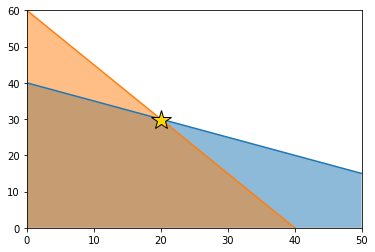

In [367]:
elite = particle_swarm(
    population = 100,
    bounds = np.array([
                [0, 40],
                [0, 40]
            ]),
    generation = 400,
    fitness_function = objective_func,
    funFeasible = funFeasible
)

x1 = np.linspace(0,50,100)
y1 = 40 - 0.5*x1

x2 = np.linspace(0,50,100)
y2 = 60 - (3/2)*x2

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,50)
plt.ylim(0,60)
plt.show()

## 2. Lamps

In [353]:
def objective_func(x):
    p,m = x[0], x[1]
    return -15*p + -10*m

def funFeasible(X):
    p,m = X[0],X[1]
    if (1/3)*p + (1/2)*m > 100: return False
    if (1/6)*p + (1/6)*m > 80: return False
    if p<0: return False
    if m<0: return False
    return True

Global Best Position:  [2.99388049e+02 2.01791513e-01]


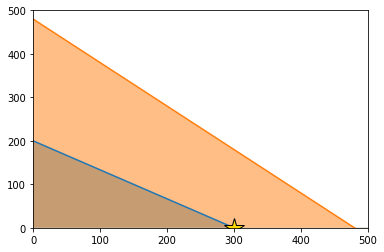

In [354]:
elite = particle_swarm(
    population = 100,
    bounds = np.array([
                [0, 400],
                [0, 400]
            ]),
    generation = 400,
    fitness_function = objective_func,
    funFeasible = funFeasible
)

x1 = np.linspace(0,500,100)
y1 = (100 - (1/3)*x1)*2

x2 = np.linspace(0,500,100)
y2 = (80 - (1/6)*x2)*6

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,500)
plt.ylim(0,500)

plt.show()

## 3. Poyoyon

In [355]:
def objective_func(x):
    p,m = x[0], x[1]
    return 10*p + 30*m

def funFeasible(X):
    p,m = X[0],X[1]
    if (1)*p + (5)*m < 15: return False
    if (5)*p + (1)*m < 15: return False
    if p<0: return False
    if m<0: return False
    return True

Global Best Position:  [2.507101   2.49898644]


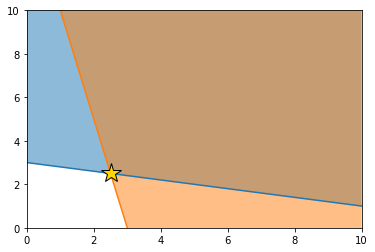

In [356]:
elite = particle_swarm(
    population = 100,
    bounds = np.array([
                [0, 5],
                [0, 5]
            ]),
    generation = 400,
    fitness_function = objective_func,
    funFeasible = funFeasible
)

x1 = np.linspace(0,10,100)
y1 = (15 - 1*x1)*(1/5)

x2 = np.linspace(0,10,100)
y2 = (15 - 5*x2)*(1)

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 100, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 100, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

## 4.  Útiles

In [357]:
def objective_func(x):
    p,m = x[0], x[1]
    return -6.5*p + -7*m

def funFeasible(X):
    p,m = X[0],X[1]
    if (2)*p + (3)*m > 600: return False
    if (1)*p + (1)*m > 500: return False
    if (2)*p + (1)*m > 400: return False
    if p<0: return False
    if m<0: return False
    return True

Global Best Position:  [150.06347915  99.87262708]


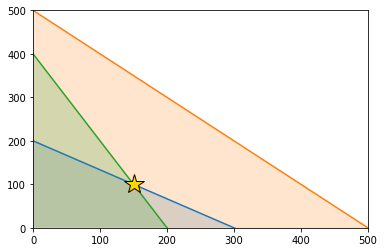

In [358]:
elite = particle_swarm(
    population = 100,
    bounds = np.array([
                [0, 500],
                [0, 500]
            ]),
    generation = 400,
    fitness_function = objective_func,
    funFeasible = funFeasible
)

x1 = np.linspace(0,500,100)
y1 = (600 - 2*x1)*(1/3)

x2 = np.linspace(0,500,100)
y2 = (500 - x2)

x3 = np.linspace(0,500,100)
y3 = (400 - 2*x3)

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.2)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.2)
plt.plot(x3, y3)
plt.fill_between(x3, y3, 0, alpha=0.2)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,500)
plt.ylim(0,500)

plt.show()

## 5. Excursión

In [359]:
def objective_func(x):
    p,m = x[0], x[1]
    return 600*p + 800*m

def funFeasible(X):
    p,m = X[0],X[1]
    if (-40)*p + (-50)*m > -400: return False
    if (1)*p + (1)*m > 9: return False
    if p<0: return False
    if m<0: return False
    return True

Global Best Position:  [4.99909179 4.00080781]


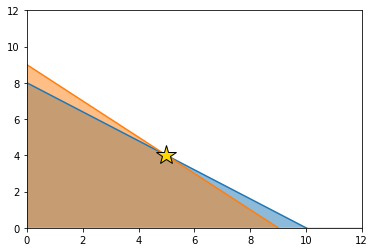

In [360]:
elite = particle_swarm(
    population = 100,
    bounds = np.array([
                [0, 8],
                [0, 10]
            ]),
    generation = 400,
    fitness_function = objective_func,
    funFeasible = funFeasible   
)

x1 = np.linspace(0,15,100)
y1 = (400 - 40*x1)*(1/50)

x2 = np.linspace(0,15,100)
y2 = (9 - x2)

plt.figure()
plt.plot(x1, y1)
plt.fill_between(x1, y1, 0, alpha=0.5)
plt.plot(x2, y2)
plt.fill_between(x2, y2, 0, alpha=0.5)
plt.plot(elite[0], elite[1], marker="*", markersize=20, markeredgecolor="black", markerfacecolor="#FFD700")
plt.xlim(0,12)
plt.ylim(0,12)

plt.show()